In [2]:
import JupyterImport
from delay import *
from QueueLen import *
from FCT import *
from shortTh import *

importing Jupyter notebook from delay.ipynb
importing Jupyter notebook from QueueLen.ipynb
importing Jupyter notebook from FCT.ipynb
importing Jupyter notebook from shortTh.ipynb


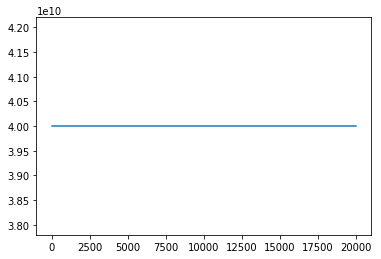

In [5]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]
original_lists=[flow_size[1:-1],[40 * 1e9 for i in range(len(flow_size) - 2)]]
plt.plot(original_lists[0], original_lists[1])

In [3]:
def parse_trace(file, normalizor):
    col = ["tmp_pkts", "flow duration", "fin_fid", "rtt times", \
               "group_id", "Tw_", "Tp_", "Np_", "?1", "?2", "?3", "?4", "?5", "Average rate", "start time"]
    df = pd.read_csv(file, sep = ' ', header = None)
    df.columns = col
    df["Normalized FCT"] = 40 * 1e9  / df["Average rate"]
    return df

In [19]:
tracefile = "/home/ovs2/eval/tcp_random_pair_32host/diff_host_4pods/4host_FID/tcp-incast-HRCC/tcp_flow_1000_0.9_Topology-4hosts-4pods-random.tcl.tr"
df = parse_trace(tracefile, original_lists)


In [21]:
df_one = df.loc[df['tmp_pkts']<20]

In [25]:
pkt_size_break=df.groupby("tmp_pkts").first()

In [27]:
pkt_size_break

,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,Normalized FCT
tmp_pkts,,,,,,,,,,,,,,,
6.0,0.000050,920,0,0,0,3,3,0,0,0.0,0.0,0,1.387745e+09,1.000009,28.823744
7.0,0.000051,1194,0,2,1,1,0,0,2,0.0,0.0,0,1.615095e+09,1.000236,24.766341
8.0,0.000063,1202,0,2,1,2,0,0,2,0.0,0.0,0,1.483212e+09,1.000208,26.968493
9.0,0.000099,1802,0,0,1,1,2,0,3,0.0,0.0,0,1.059881e+09,1.001106,37.740080
10.0,0.000063,1210,0,2,1,3,0,0,2,0.0,0.0,0,1.843717e+09,1.000180,21.695305
11.0,0.000081,1306,0,2,0,3,3,0,2,0.0,0.0,0,1.580952e+09,1.000388,25.301211
12.0,0.000065,1346,0,3,0,0,0,0,2,0.0,0.0,0,2.151700e+09,1.000152,18.589951
13.0,0.000067,1354,0,3,0,1,0,0,2,0.0,0.0,0,2.283130e+09,1.000125,17.519808
14.0,0.000065,1362,0,3,0,2,0,0,2,0.0,0.0,0,2.526802e+09,1.000097,15.830289


15879.0	0.008253	**2364**	0	2	0	3	0	0	2	0.0	0.0	0	2.247286e+10	1.003302	1.779925

In [28]:
directory = "/home/ovs2/eval/tcp_random_pair_32host/diff_host_4pods/4host_FID/out_tr/4p4h1000f/"
filename = "4p4h1000f_HRCC_out.tr"

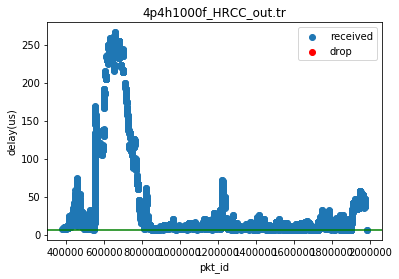

In [31]:
delay = DelayAnalysis(directory, filename, fid = 2364)
delay.print_pkt_delay(12, title = filename)

from [39 16  5 11  1 12]
to [16  5 11  1 12 22]


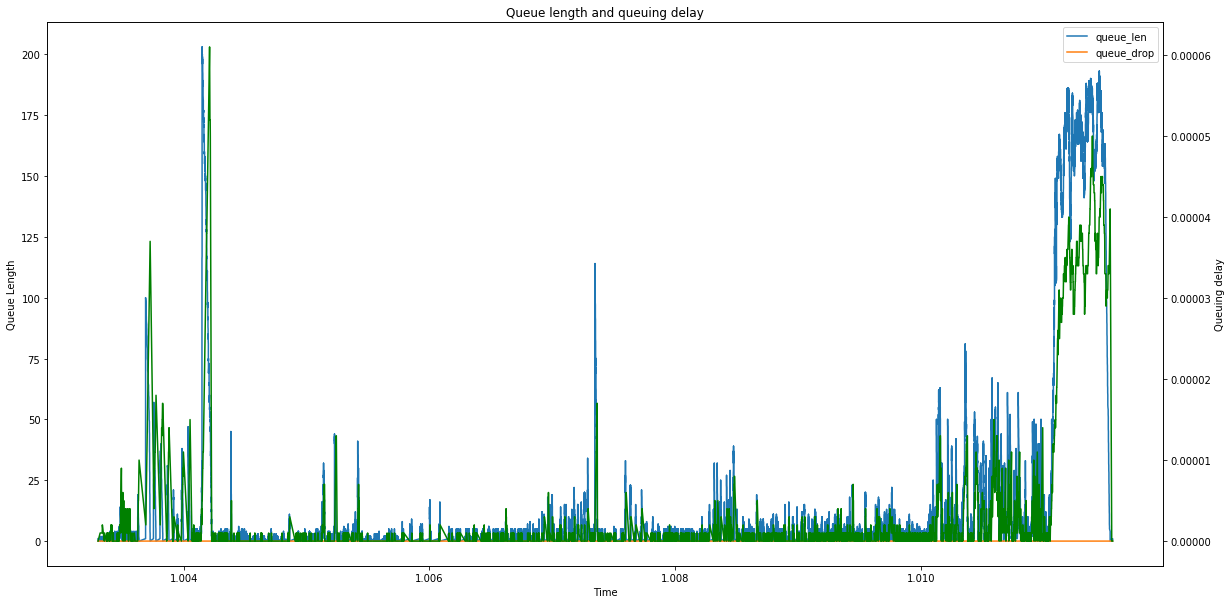

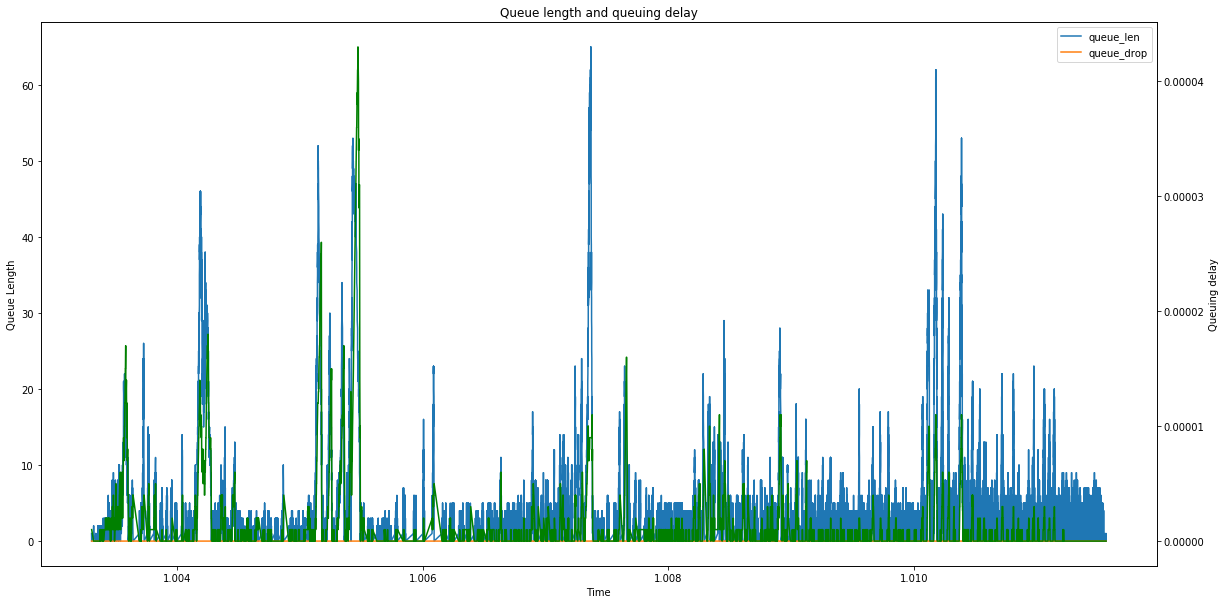

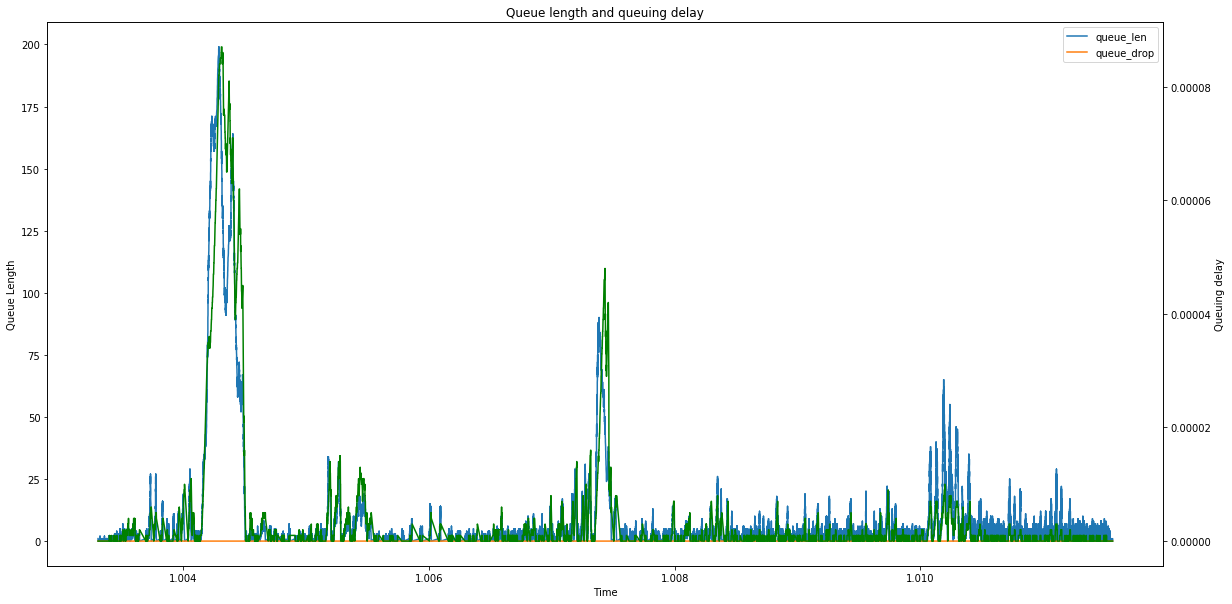

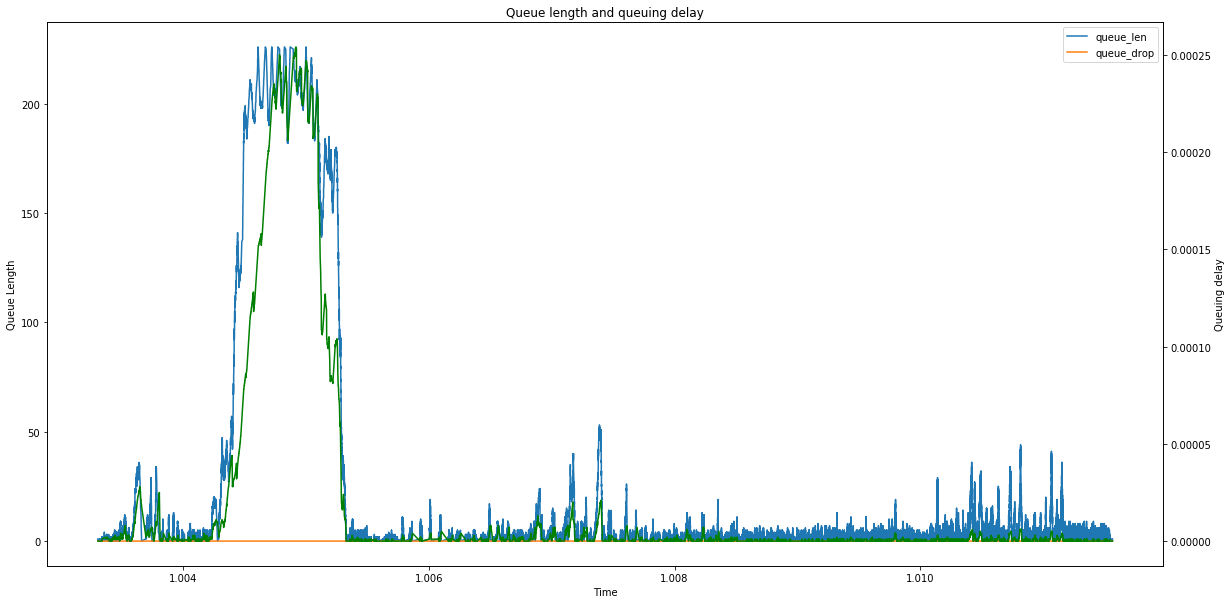

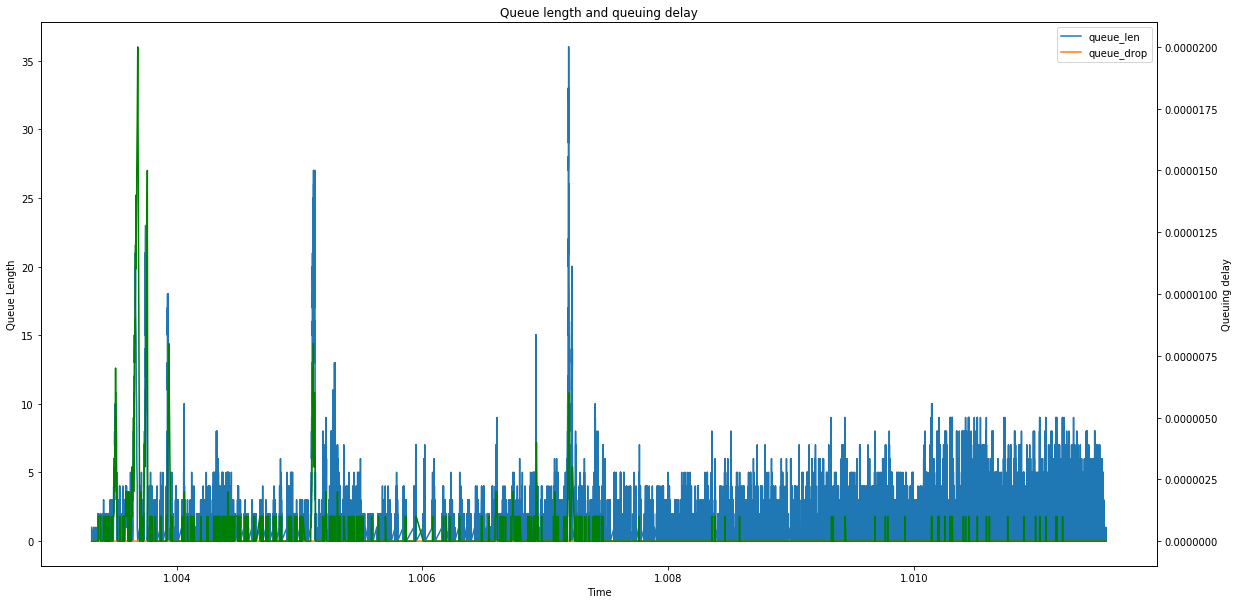

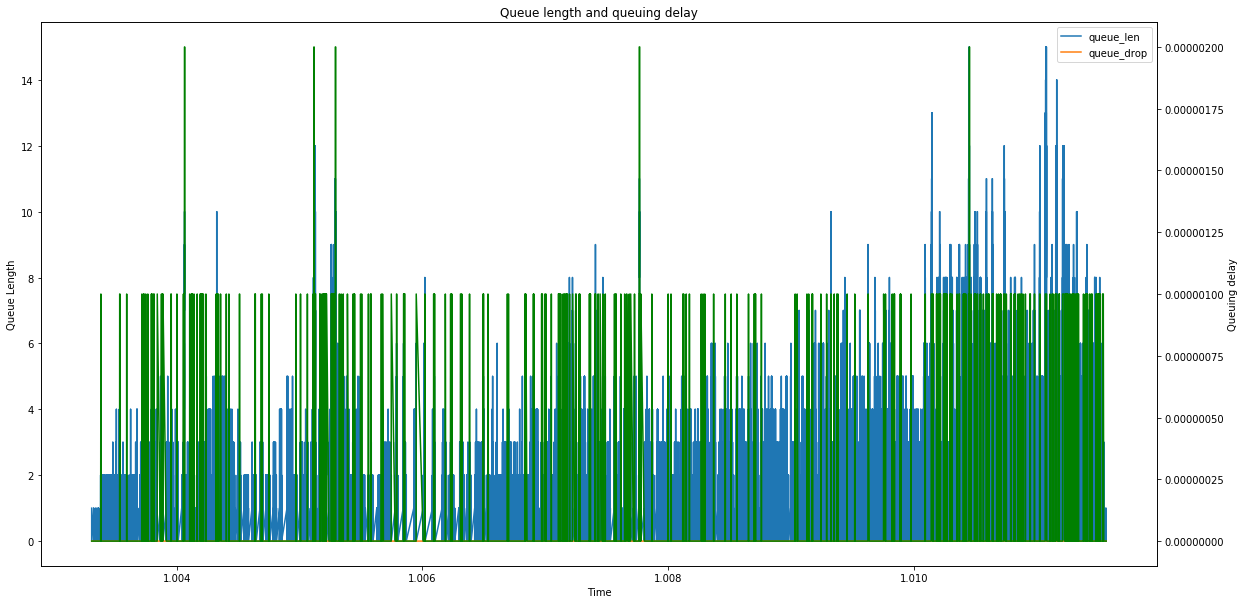

In [32]:
#df_out = read_out_tr(directory, filename)
plot_flow_path_queue_length(delay.raw_data, 2364)

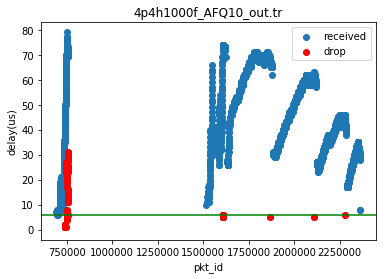

from [38 16  4  8  2 14]
to [16  4  8  2 14 31]


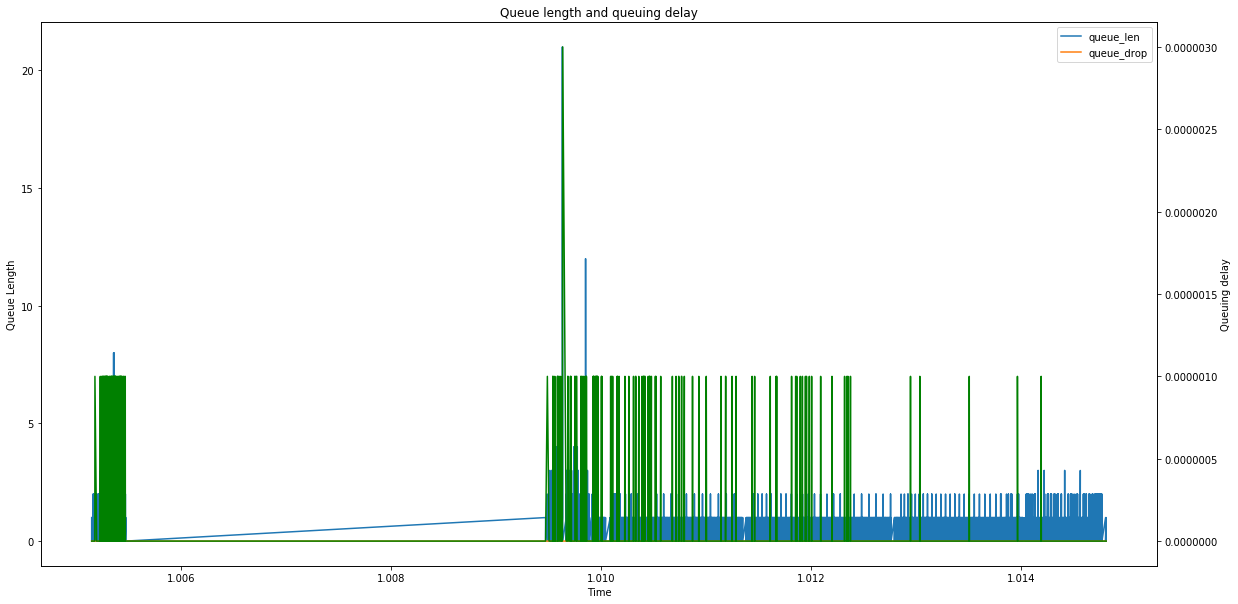

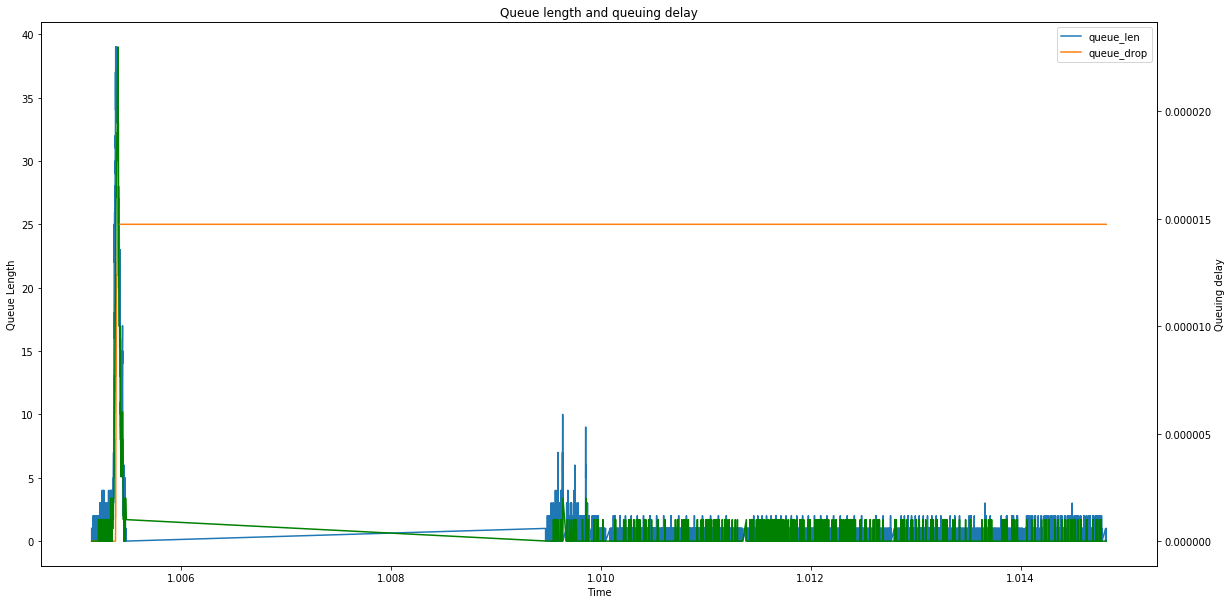

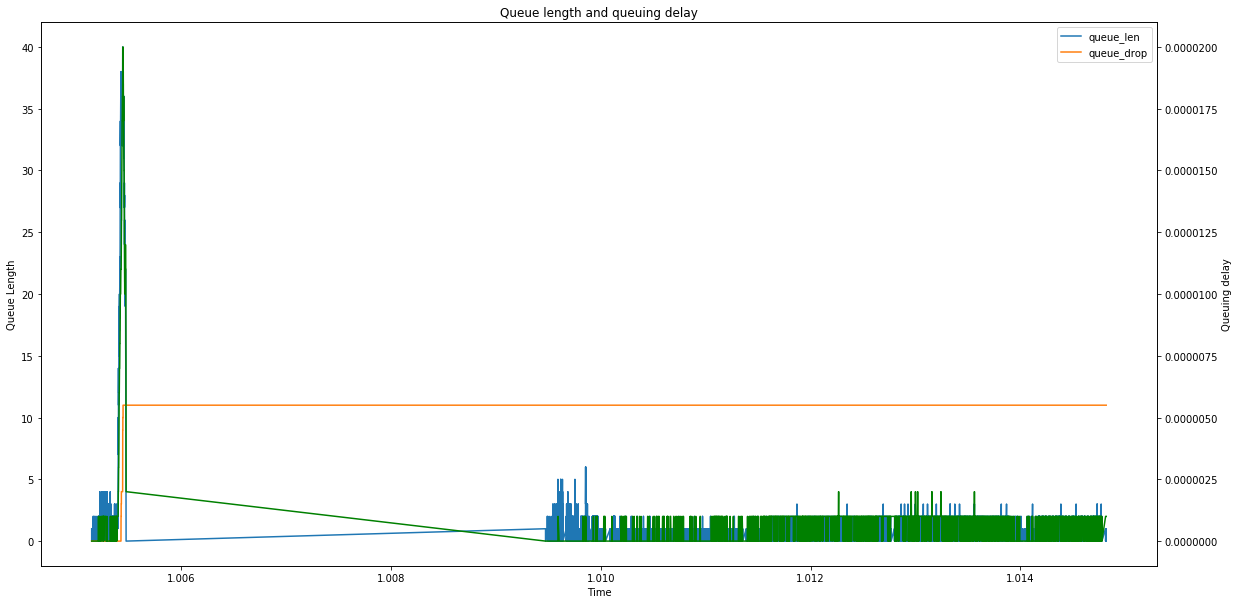

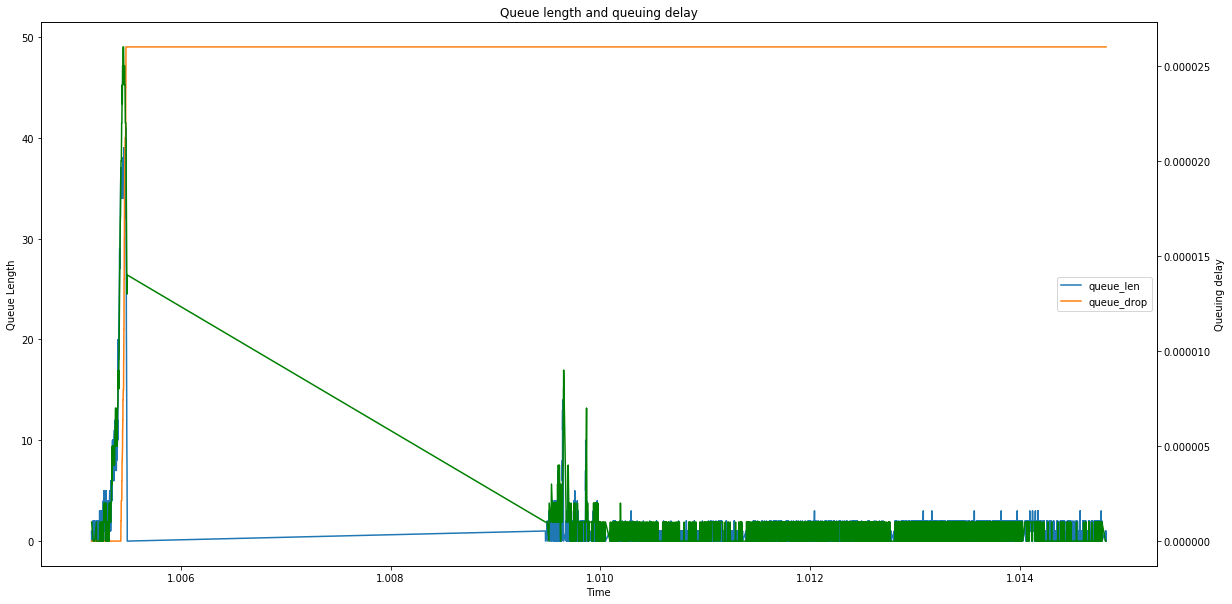

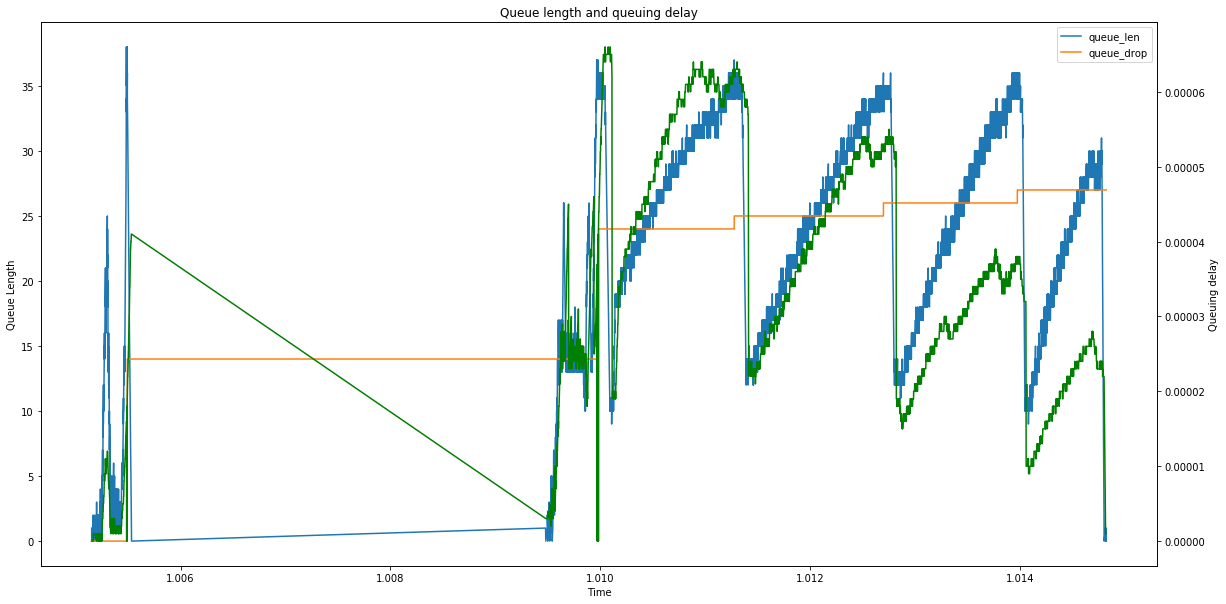

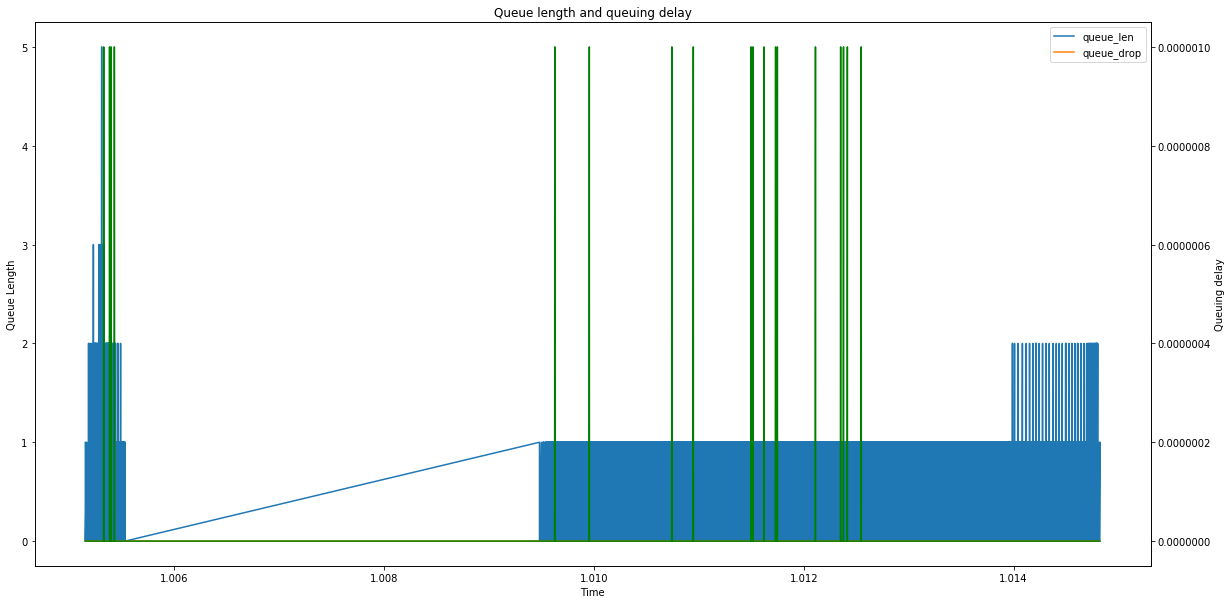

In [33]:
filename = "4p4h1000f_AFQ10_out.tr"
delay = DelayAnalysis(directory, filename, fid = 2364)
delay.print_pkt_delay(12, title = filename)
plot_flow_path_queue_length(delay.raw_data, 2364)

In [6]:
tracefile = "/home/ovs2/eval/tcp_random_pair_32host/diff_host_4pods/4host_FID/tcp-incast-AFQ100/tcp_flow_1000_0.9_Topology-4hosts-4pods-random.tcl.tr"
df = parse_trace(tracefile, original_lists)


In [14]:
df.loc[df['fin_fid'].isin([2364])]

,tmp_pkts,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,Normalized FCT


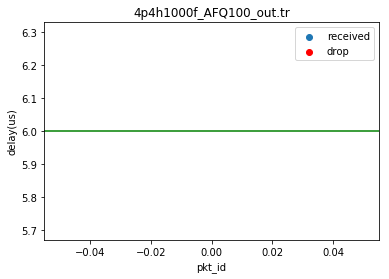

from []
to []


In [34]:
filename = "4p4h1000f_AFQ100_out.tr"
delay = DelayAnalysis(directory, filename, fid = 2364)
delay.print_pkt_delay(12, title = filename)
plot_flow_path_queue_length(delay.raw_data, 2364)

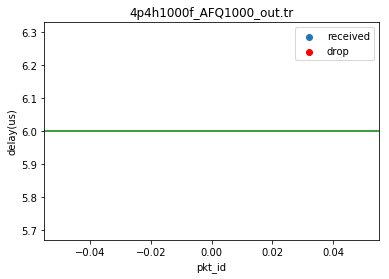

from []
to []


In [35]:
filename = "4p4h1000f_AFQ1000_out.tr"
delay = DelayAnalysis(directory, filename, fid = 2364)
delay.print_pkt_delay(12, title = filename)
plot_flow_path_queue_length(delay.raw_data, 2364)

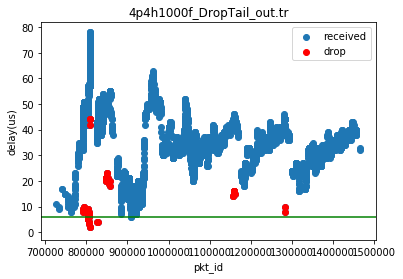

from [38 16  4  8  2 14]
to [16  4  8  2 14 31]


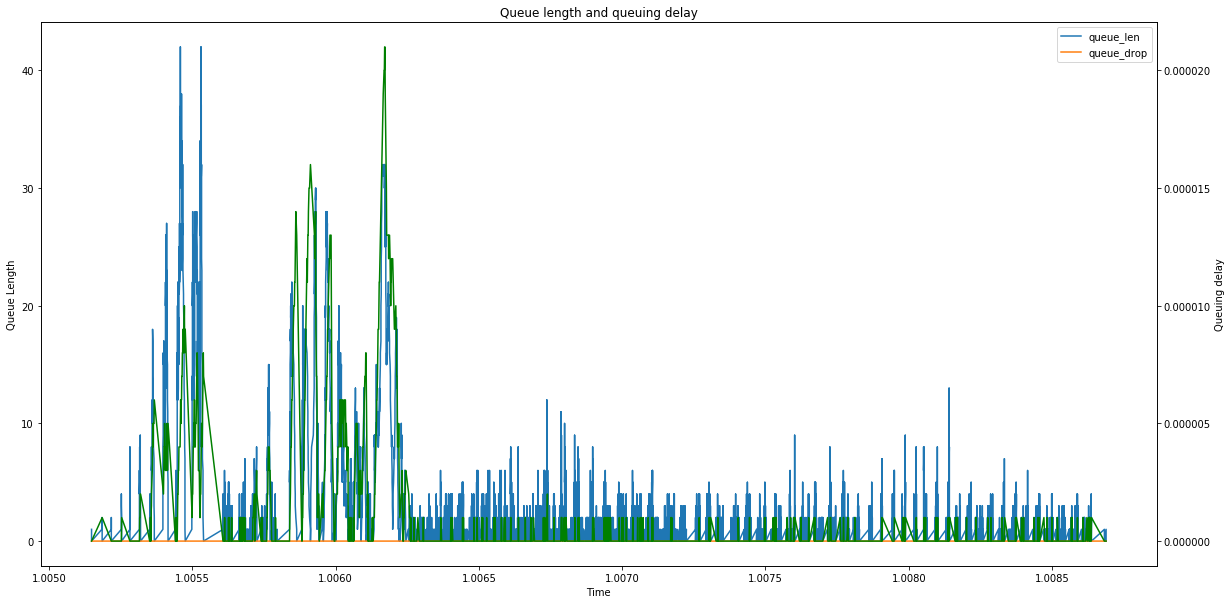

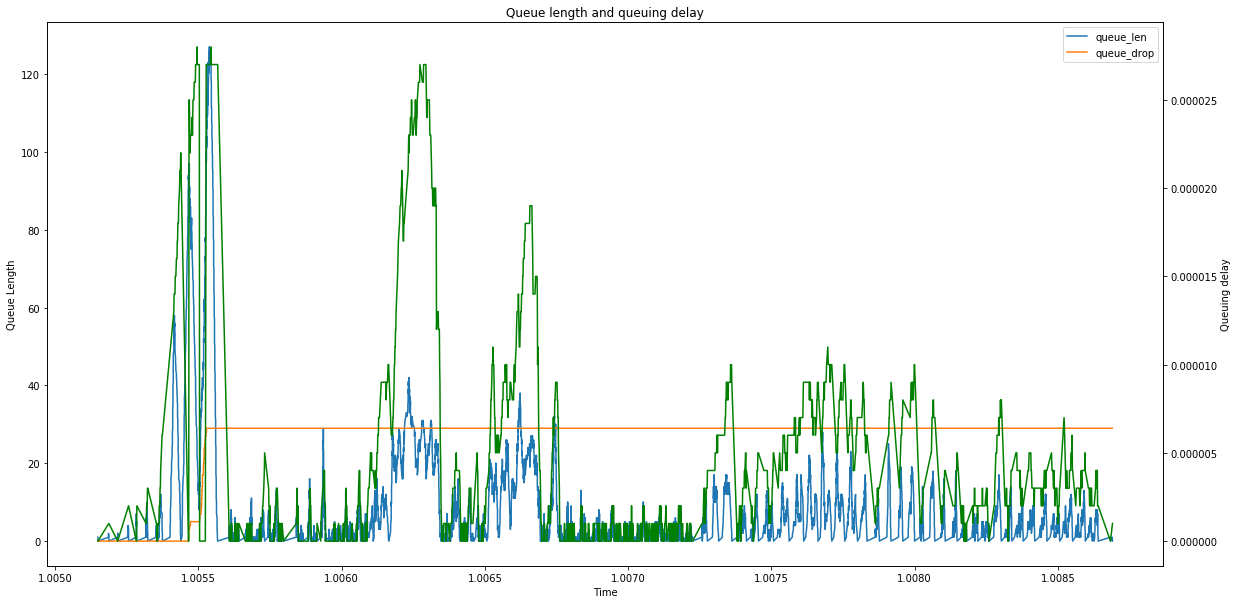

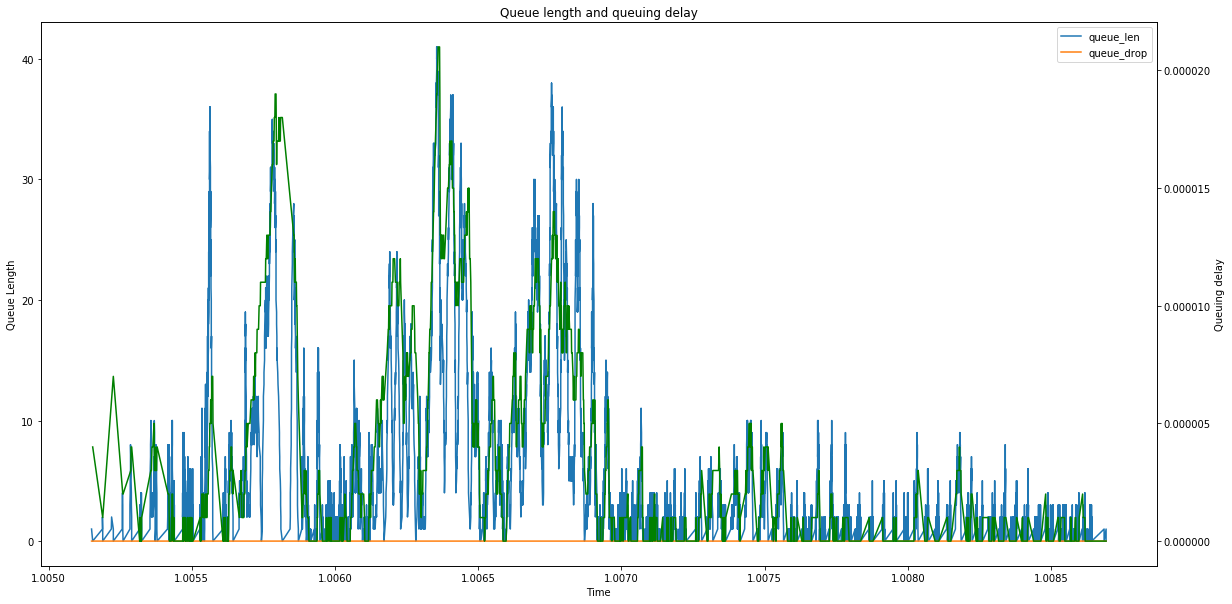

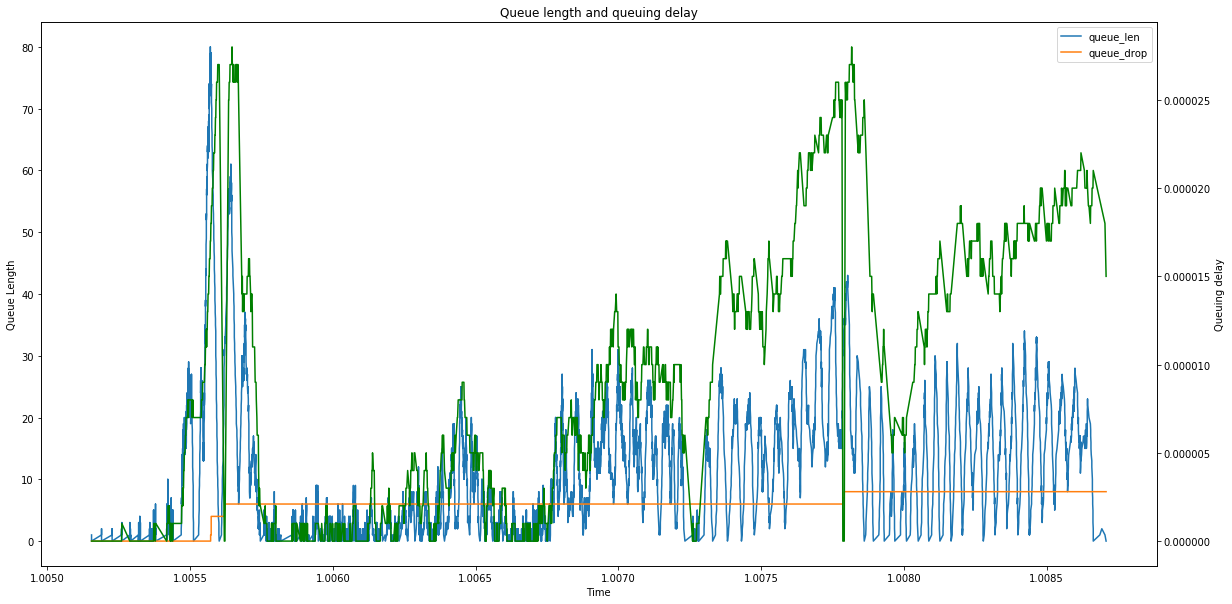

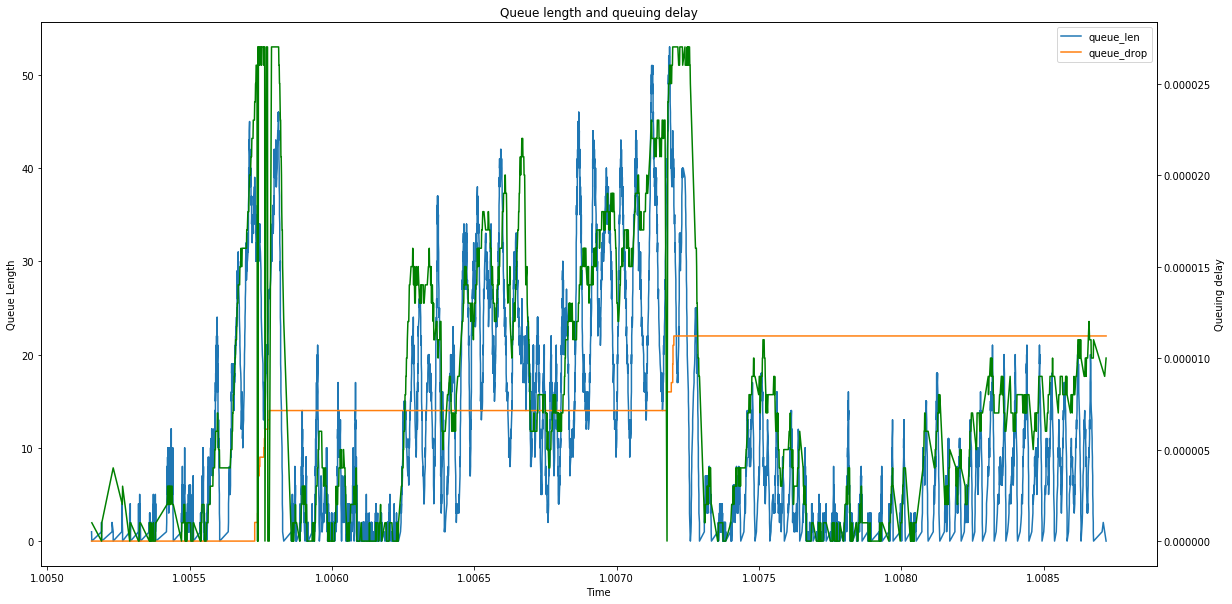

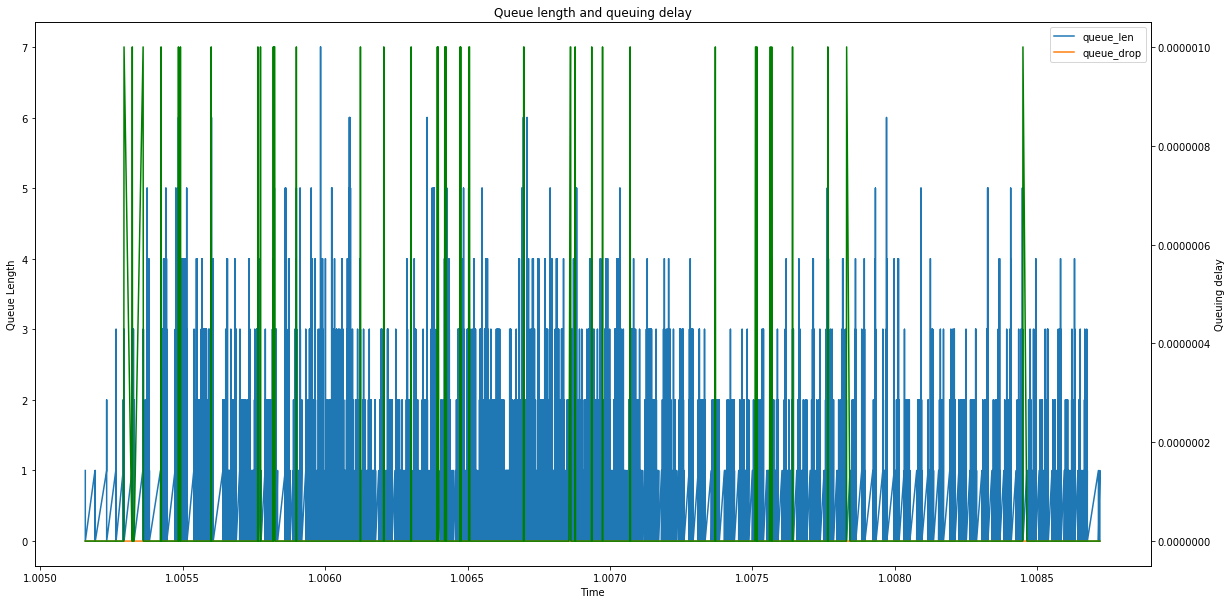

In [36]:
filename = "4p4h1000f_DropTail_out.tr"
delay = DelayAnalysis(directory, filename, fid = 2364)
delay.print_pkt_delay(12, title = filename)
plot_flow_path_queue_length(delay.raw_data, 2364)